In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Define Model $g(x)$ That Estimates $y(x)$ Using Parameters $m$ and $b$

$g(x) = mx+b$



In [225]:
def linear_regression(theta0, theta1, x):
    return theta0+theta1*x

### Function to Generate Linear Data y(x)

The function should parameters $(m,b)$, the more noise ($\sigma$) introduced the harder it should be to get the parameters as the signal is more hidden

In [226]:
def generate_regression_data(m, sigma, nb_obs, b):
    
    data = np.array(None)
    
    for i, obs in enumerate(range(nb_obs)):

        new_point = (m*i+b)+np.random.normal(0, sigma)
        data = np.append(data, new_point)

    return data[1:]

### Define Loss Function

$J(\Theta) = \frac{1}{N} \sum_{x} (g(x) - y(x))^2$

The loss function inputs the parameters $\Theta$ and calculations the error of the model using these parameters on the data $y(x)$

$\Theta = (m,b)$

Here we:

a) Set the seed so that we don't get different linear data on each calculation of the error 

b) Generate linear data of the form $y(x) = mx+b + \mathcal{N}(x; \mu,\,\sigma^{2})$ so there is noise

c) For each observation in the linear data calculate the squared error $[g(x) - y(x)]^2$ , and store it in the list squared_errors 

d) Take the mean of the squared errors to get the output of $J(\Theta)$

In [227]:
def error(m,b,N):
    
    np.random.seed(0)
    y = generate_regression_data(1, 2, N, 0) #Real m = 3, b = 100
    
    squared_errors = []
    
    x = list(range(N))
    
    for i, obs in enumerate(y):
        prediction = m*x[i]+b
        real_value = y[i]
        squared_error = (prediction-real_value)**2
        squared_errors.append(squared_error)
        
    
    return np.mean(squared_errors)

### Generate Multi-Dimentional Data $J(m,b)$

$ m \in [-5:5] $ Spacing = $N$

$b \in [-5:5] $ Spacing = $N$

Size of the result = $N \times N$

For each combination of $(m,b)$ in our discretised space we will have a value of $J(m,b)$ and size($\Theta$)=2 so we have 3 axis - $J, m, b$ and $N \times N$ possible outputs.

In [228]:
def multi_dim_data(N):
    
    m = np.linspace(-5, 5, N)
    b = np.linspace(-5, 5, N)
    
    M, B = np.meshgrid(m,b)
    
    zs = np.array([error(m, b, N) for m, b in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)
        
    return M,B,Z,m,b

In [229]:
M,B,Z,m,b = multi_dim_data(11)

### Look for the argmin of $J(m,b)$ Using Brute Force ###

Since our function is within a small discrete space (11x11) , it is possible to search for the combination $(m,b)$ that minimises $J$ using brute force i.e. testing all possible combinations. In other words we are looking for the gradient and intercept of the 2D-Line that minimises the mean squared error between the generated data points and the model - which is a straight line with gradient $m$ and intercept $b$.

The idea of taking a model, in this case a closed formula, that minimises a cost, in this case the mean squared error, between the dataset and the model. In doing this, we hope that the model can estimate the the output for unseen input variables. For example even if we only see inputs between x=2 and x=3, we hope that the fitted model with parameters $(m,b)$ can output an accurate value for x=4. 

In [230]:
def min_value_location(Z):
    
    minb, minm = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
                
    return minm, minb

minm, minb = min_value_location(Z)

### Plot of $J(\Theta)$ ###

We should observe the minimum value looks to minimise $J(\theta)$ within the bounds $m \in [-5,5]$ and $b \in [-5,5]$. Remember we generated linear data with parameters $(m=1,b=0)$, so we hope to see the minima at these points.

Remember we included noise with a variance, $\sigma^2$, of 1. This means the signal is distorted and as a result it may cause the optimal parameters of the model $(m,b)$ to be off. Here we see this is the case, as the intercept parameter, $b$, is pushed up by 1-unit to adjust for the noise.

If there was no noise, we would obtain the exact parameters with no error as the signal is clear and the brute force algorithm will iterate over the exact combination of $(m,b)$ that minimises $J(m,b)$.

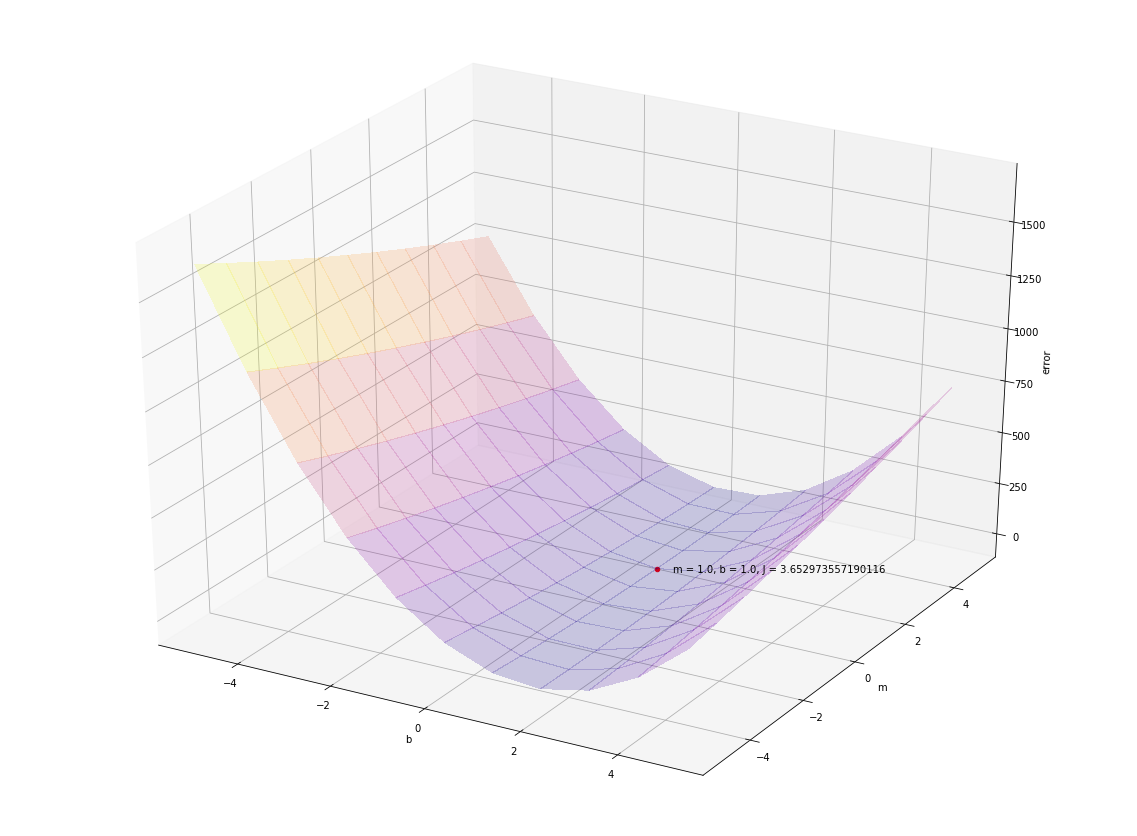

In [236]:
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, alpha=0.2, linewidth=0, antialiased=False,cmap='plasma')
ax.scatter(m[minm], b[minb], Z[minm,minb], c='r', marker='o')
ax.text(m[minm]+0.35, b[minb], Z[minm,minb], "m = {}, b = {}, J = {}".format(m[minm], b[minb], Z[minm,minb]))

ax.set_xlabel('b')
ax.set_ylabel('m')
ax.set_zlabel('error')

plt.show()

### The Effect of Noise

Noise was drawn from a gaussian distribution with $\mu=0$ and $\sigma^2 = 2$ when the linear data was generated. This meant that the optimal solution resulting in zero error did not exist in the discretised space, and the best solution was $\Theta = (1,1)$

Has there been no noise the best solution would have existed in the discretised space and it would have returned $\Theta = (1,0)$. Feel free to check this by going back to where the linear regression data is generated and removing the noise.

Here we generate the regresion data with and without noise to show that by shifting the intercept up by 1, the parameters $\Theta = (1,1)$ are actually a better fit for the noisy data, but since the goal is always to extract the true signal the noise has caused some error in our estimation of parameters to minimise the mean squared error. 

In [267]:
model_output = generate_regression_data(1, 0, 11, 1)

In [268]:
actual_output = generate_regression_data(1, 0, 11, 0)

In [269]:
noise_data = generate_regression_data(1, 2, 11, 0)
clean_data = generate_regression_data(1, 0, 11, 0)

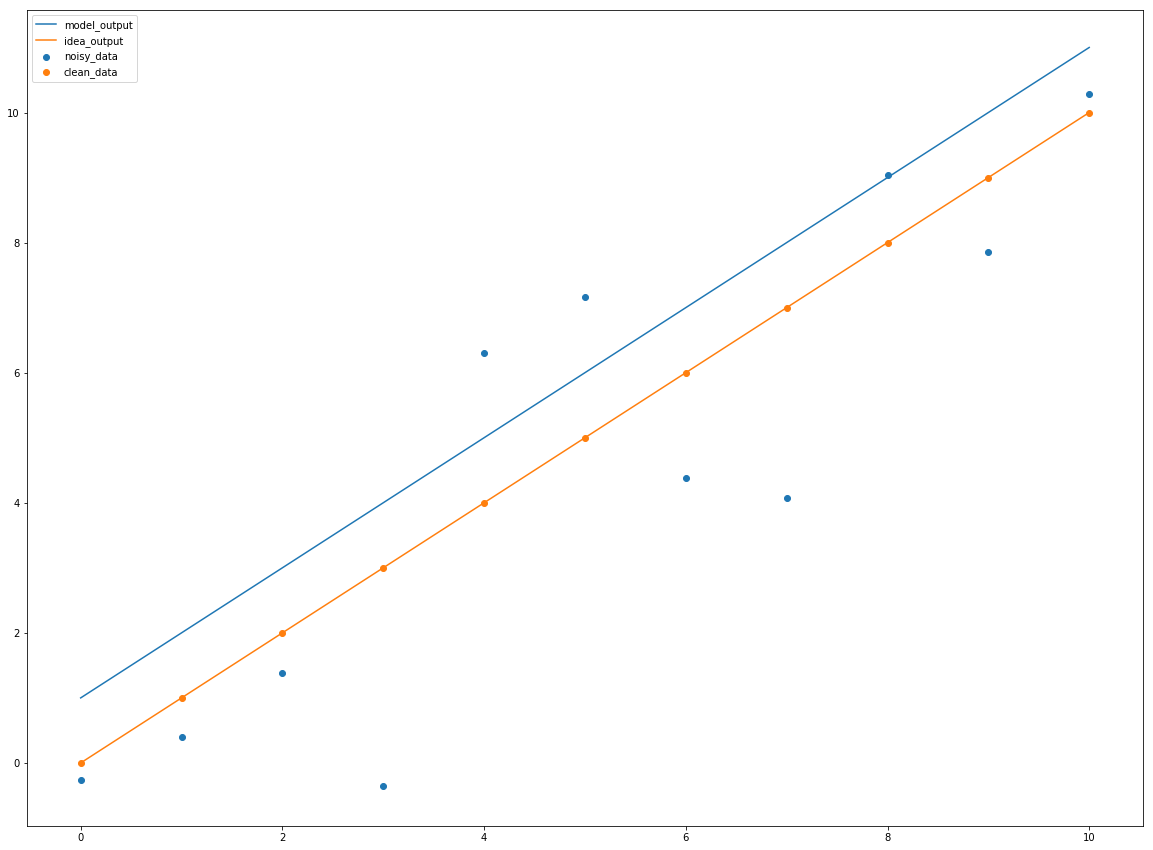

In [270]:
fig, axs = plt.subplots(figsize=(20,15))

axs.plot(model_output, label = 'model_output')
axs.plot(actual_output, label = 'ideal_output')
axs.scatter(range(len(noise_data)), noise_data, label = 'noisy_data')
axs.scatter(range(len(clean_data)), clean_data, label = 'clean_data')

plt.legend()
plt.show()